# Arduino elektronica
Wanneer je alleen een knop en een LED gebruikt ben je snel uitgekeken en heb je nog nauwelijks iets gedaan… We willen robots aansturen, racemachines niet tegen muren laten botsen, kassen automatisch aansturen en ga zo maar door. Daar hebben we sensoren voor nodig. Vrijwel alle sensoren werken hetzelfde, de weerstandswaarde verandert bij een veranderende input (bijvoorbeeld licht of kracht).

We gaan beginnen met een lichtsensor. Voor een lichtsensor hebben we een LDR nodig, zie de foto. LDR staat voor Light Dependent Resistor (licht afhankelijke weerstand). De weerstandswaarde verandert met veranderende lichtintensiteit, zie de grafiek.

We sluiten de LDR in serie aan met een Ohmse weerstand (een weerstand met een constante weerstandswaarde), zie {numref}`Figuur {number} <fig_deler_LDR>`. Zo hebben we een spanningsdeler gemaakt. Een deel van de spanning staat over de LDR en een deel van de spanning staat over de weerstand. Het enige wat we moeten doen is de spanning over de LDR uitlezen en we weten hoe licht het is!

```{figure} Figures/spanningsdeler_LDR.png
---
width: 30%
name: fig_deler_LDR
---
De spanningsdeler met Ohmse weerstand en LDR.
```

Het is belangrijk om iets meer te weten over hoe een spanningsdeler werkt: bij het uitlezen van een sensor maken we gebruik van een spanningsdeler. De LDR en de Ohmse weerstand staan in serie zodat er geldt: $R_{totaal} = R_{LDR} + R_Ω$. De bronspanning is 5,0 Volt en omdat de weerstanden in serie geschakeld zijn geldt dat de stroomsterkte overal gelijk is. De stroomsterkte bereken je met: $I = \frac{U_{bron}}{R_{totaal}}$. De spanning wordt netjes verdeeld en de grootste weerstand krijgt de meeste spanning. Als je deze informatie combineert zie je dat de verhouding tussen de spanningen gelijk is aan de verhouding tussen de weerstanden: $\frac{U_{LDR}}{U_Ω} = \frac{R_{LDR}}{R_Ω}$.

Als het lichter is, wordt de weerstandswaarde van de LDR kleiner waardoor er minder spanning over de LDR staat maar meer spanning over de Ohmse weerstand. De spanning over de LDR ($U_{LDR} = 5,0 · \frac{R_{LDR}}{R_{LDR} + R_Ω}$) kun je meten met behulp van de ANALOG IN van de Arduino. De spanning is dan een maat voor de gemeten lichtintensiteit. 

In welk gebied je sensor gevoelig moet zijn bepaalt de keuze voor een Ohmse weerstand. Zie de tweede grafiek. De LDR heeft een waarde tussen de 10 kΩ en 20 kΩ: dus kies een grote weerstand!


````{exercise} Een lichtsensor

De schakeling lijkt erg op de schakeling van opdracht 4. Alleen nu gebruiken we een LDR en een ANALOG IN.

a) Bouw de schakeling.

```{figure} Figures/LDR.PNG
---
width: 50%
name: fig_LDR
---
```

b) Open in het script analogReadSerial: voorbeelden/basis/Analogreadserial.

De belangrijkste code vind je hieronder
```{code} C
void loop() {
    int sensorValue = analogRead(A0);
    Serial.println(sensorValue);
    delay(10);
}
```

De Arduino krijgt de opdracht om de analoge poort uit te lezen (`analogRead(A0)`). Deze waarde wordt gehangen aan de variabele sensorValue. Vervolgens willen we deze waarde weten. De waarde wordt dan ook geprint voor ons (`Serial.println(sensorValue);`), deze is te lezen met behulp van de seriële monitor (het loepje rechts bovenin). Voor de stabiliteit is het goed om een delay in te bouwen.

c) Upload het script naar de Arduino en lees de waarden uit met behulp van de Serial Monitor.

d) Bedek met je hand de LDR. Verandert de gegeven waarde?

e) Combineer opdracht 3 en deze opdracht. Zorg ervoor dat de LED feller gaat branden als het donkerder wordt.

f) Breid de schakeling verder uit zodat je de hele schakeling ook met een knop aan en uit kan zetten.

g) Leg met behulp van grafiek 2 uit dat een grote waarde van RΩ ervoor zorgt dat de LDR in het hele bereik vrijwel even gevoelig is.

h) Bedenk een manier om de sensor zelf te laten ijken. Dus laat de sensor zelf de minimale en maximale waarde bepalen.
````

```{exercise} Reactietijd meten

Bouw een reactietijdmeter waarbij iemand zo snel mogelijk op de knop moet drukken als een rode LED uit gaat en een groene LED aangaat. Om dit lastiger te maken voor de persoon die moet drukken kun je gebruik maken van functie `random(a,b)`. Waarbij a en b getallen zijn, zo kan je een willekeurige delay inbouwen. De functie `millis()` geeft aan hoeveel milliseconde ervoor bij zijn gegaan.
```


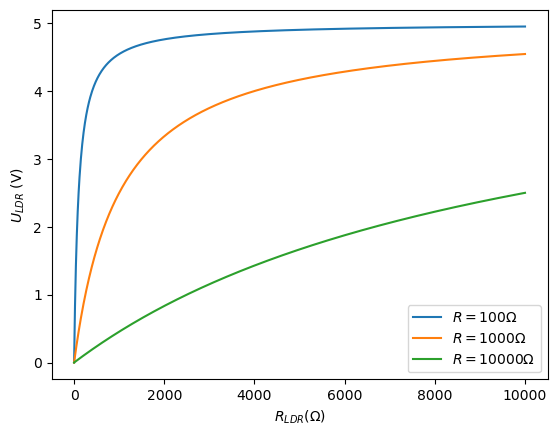

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def U_LDR(U_b, R, R_LDR):
    return R_LDR/(R+R_LDR)*U_b

R_LDR = np.linspace(0,int(1e4),1000)

plt.figure()
plt.plot(R_LDR,U_LDR(5,100,R_LDR),label="$R=100\Omega$")
plt.plot(R_LDR,U_LDR(5,1000,R_LDR),label="$R=1000\Omega$")
plt.plot(R_LDR,U_LDR(5,10000,R_LDR),label="$R=10000\Omega$")
plt.xlabel('$R_{LDR} (\Omega)$')
plt.ylabel('$U_{LDR}$ (V)')

plt.legend()
plt.show()